## Data Exploration and Analysis from Public APIs

In [2]:
# import all neсessary libraries
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Extract Data

In [3]:
api_key = '1'
base_url = 'https://www.thecocktaildb.com/api/json/v1/'

In [4]:
# function for getting coctails by letter (API doesn't give to take all cocktails at one time)
def get_cocktails_by_letter(letter):
    url = f'{base_url}{api_key}/search.php?f={letter}'
    response = requests.get(url)
    data = response.json()
    return data

# function for creating dataset with necessary columns
def create_cocktail_dataset():
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    dataset = []

    for letter in alphabet:
        result = get_cocktails_by_letter(letter)

        if result and 'drinks' in result and result['drinks']:
            for drink_info in result['drinks']:
                dataset.append({
                    'id': drink_info['idDrink'],
                    'name': drink_info['strDrink'],
                    'tag':drink_info['strTags'],
                    'category': drink_info['strCategory'],
                    'alcoholic': drink_info['strAlcoholic'],
                    'glass': drink_info['strGlass'],
                    'ingredients': [drink_info[f'strIngredient{i}'] for i in range(1, 16) if drink_info[f'strIngredient{i}']],
                    'measurements': [drink_info[f'strMeasure{i}'] for i in range(1, 16) if drink_info[f'strMeasure{i}']],
                    'instructions': drink_info['strInstructions'],
                    'modified_date': drink_info['dateModified']
                })

    return dataset

# Example usage
cocktail_dataset = create_cocktail_dataset()

In [5]:
# Display the dataset using Pandas DataFrame
df = pd.DataFrame(cocktail_dataset)
df.head()

,id,name,tag,category,alcoholic,glass,ingredients,measurements,instructions,modified_date
0,17222,A1,None,Cocktail,Alcoholic,Cocktail glass,"[Gin, Grand Marnier, Lemon Juice, Grenadine]","[1 3/4 shot , 1 Shot , 1/4 Shot, 1/8 Shot]","Pour all ingredients into a cocktail shaker, m...",2017-09-07 21:42:09
1,13501,ABC,None,Shot,Alcoholic,Shot glass,"[Amaretto, Baileys irish cream, Cognac]","[1/3 , 1/3 , 1/3 ]",Layered in a shot glass.,2016-08-31 19:32:08
2,17225,Ace,None,Cocktail,Alcoholic,Martini Glass,"[Gin, Grenadine, Heavy cream, Milk, Egg White]","[2 shots , 1/2 shot , 1/2 shot , 1/2 shot, 1/2...",Shake all the ingredients in a cocktail shaker...,2017-09-07 22:05:06
3,14610,ACID,None,Shot,Alcoholic,Shot glass,"[151 proof rum, Wild Turkey]","[1 oz Bacardi , 1 oz ]",Poor in the 151 first followed by the 101 serv...,2016-11-15 11:28:37
4,17837,Adam,"Alcoholic,Holiday",Ordinary Drink,Alcoholic,Cocktail glass,"[Dark rum, Lemon juice, Grenadine]","[2 oz , 1 oz , 1 tsp ]","In a shaker half-filled with ice cubes, combin...",2016-09-02 11:29:29


### Clean and Preprocess

In [6]:
# Check how many rows and columns there are
df.shape

(426, 10)


#### Check missing values




In [7]:
# Check missing values
df.isnull().sum()

id                 0
name               0
tag              325
category           0
alcoholic          0
glass              0
ingredients        0
measurements       0
instructions       0
modified_date     43
dtype: int64

In [8]:
# remove a column 'tag'
df.drop('tag', axis = 1, inplace = True)

In [9]:
df.isnull().sum()

id                0
name              0
category          0
alcoholic         0
glass             0
ingredients       0
measurements      0
instructions      0
modified_date    43
dtype: int64

#### Remove duplicates

In [10]:
# Show all duplicates
df[df.duplicated(subset='ingredients')]

,id,name,category,alcoholic,glass,ingredients,measurements,instructions,modified_date
196,13837,Kir Royale,Ordinary Drink,Alcoholic,Champagne Flute,"[Creme de Cassis, Champagne]","[1 part , 5 parts ]","Pour Creme de cassis in glass, gently pour cha...",2017-09-02 17:39:48
221,15086,Limona Corona,Beer,Alcoholic,Beer Glass,"[Corona, Bacardi Limon]","[1 bottle , 1 oz ]",Open the Corona. Fill the empty space in the n...,2015-09-03 03:51:02
235,11728,Martini,Cocktail,Alcoholic,Cocktail glass,"[Gin, Dry Vermouth, Olive]","[1 2/3 oz , 1/3 oz , 1 ]",Straight: Pour all ingredients into mixing gla...,2017-09-02 12:51:35


In [11]:
df = df.drop_duplicates(subset = 'ingredients')



---

There are 3 duplicates in the dataset, which we could remove.


---



---



#### Check data types in each column and chang it if it's necessary

In [12]:
df.dtypes

id               object
name             object
category         object
alcoholic        object
glass            object
ingredients      object
measurements     object
instructions     object
modified_date    object
dtype: object

In [13]:
# Change data types of modified_date column
df['modified_date'] = pd.to_datetime(df['modified_date'])
df['modified_year'] = df['modified_date'].dt.year

df['modified_year'].unique()

<ipython-input-13-c366219f3ced>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['modified_date'] = pd.to_datetime(df['modified_date'])
<ipython-input-13-c366219f3ced>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['modified_year'] = df['modified_date'].dt.year


array([2017., 2016., 2015.,   nan, 2018.])

In [14]:
# Find a mode of modified_year to fill in Nan
df['modified_year'].mode()

0    2017.0
Name: modified_year, dtype: float64

In [15]:
# Fill in missing values
df.modified_year = df.modified_year.fillna(value = 2017.0)

<ipython-input-15-a5c0f1aadc22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.modified_year = df.modified_year.fillna(value = 2017.0)


In [16]:
# Remove dot in the end of the year
df.modified_year.astype(int)

0      2017
1      2016
2      2017
3      2016
4      2016
       ... 
421    2017
422    2017
423    2017
424    2017
425    2017
Name: modified_year, Length: 423, dtype: int64

### Analyze

In [17]:
df.head()

,id,name,category,alcoholic,glass,ingredients,measurements,instructions,modified_date,modified_year
0,17222,A1,Cocktail,Alcoholic,Cocktail glass,"[Gin, Grand Marnier, Lemon Juice, Grenadine]","[1 3/4 shot , 1 Shot , 1/4 Shot, 1/8 Shot]","Pour all ingredients into a cocktail shaker, m...",2017-09-07 21:42:09,2017.0
1,13501,ABC,Shot,Alcoholic,Shot glass,"[Amaretto, Baileys irish cream, Cognac]","[1/3 , 1/3 , 1/3 ]",Layered in a shot glass.,2016-08-31 19:32:08,2016.0
2,17225,Ace,Cocktail,Alcoholic,Martini Glass,"[Gin, Grenadine, Heavy cream, Milk, Egg White]","[2 shots , 1/2 shot , 1/2 shot , 1/2 shot, 1/2...",Shake all the ingredients in a cocktail shaker...,2017-09-07 22:05:06,2017.0
3,14610,ACID,Shot,Alcoholic,Shot glass,"[151 proof rum, Wild Turkey]","[1 oz Bacardi , 1 oz ]",Poor in the 151 first followed by the 101 serv...,2016-11-15 11:28:37,2016.0
4,17837,Adam,Ordinary Drink,Alcoholic,Cocktail glass,"[Dark rum, Lemon juice, Grenadine]","[2 oz , 1 oz , 1 tsp ]","In a shaker half-filled with ice cubes, combin...",2016-09-02 11:29:29,2016.0


#### Cocktail Categories Bar Chart

In [18]:
df.category.unique()

array(['Cocktail', 'Shot', 'Ordinary Drink', 'Other / Unknown',
       'Coffee / Tea', 'Beer', 'Punch / Party Drink', 'Shake',
       'Soft Drink', 'Homemade Liqueur', 'Cocoa'], dtype=object)

In [19]:
df.category.nunique()

11

In [20]:
# Group cocktails by category
category = df['category']
counts = category.value_counts()

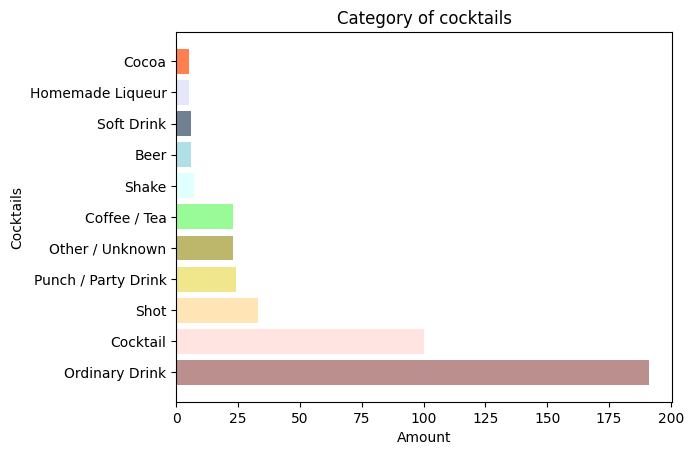

In [21]:
#add colors
colors = ['rosybrown','mistyrose','moccasin','khaki', 'darkkhaki', 'palegreen', 'lightcyan', 'powderblue', 'slategray', 'lavender', 'coral']

# Graph a plot by sort of beverages
plt.barh(counts.index, counts, color = colors)

plt.title('Category of cocktails')
plt.xlabel('Amount')
plt.ylabel('Cocktails')
plt.show()




---
The most popular cocktail in the dataset is ordinary drink.


---



---




#### Years of modified Line Plot

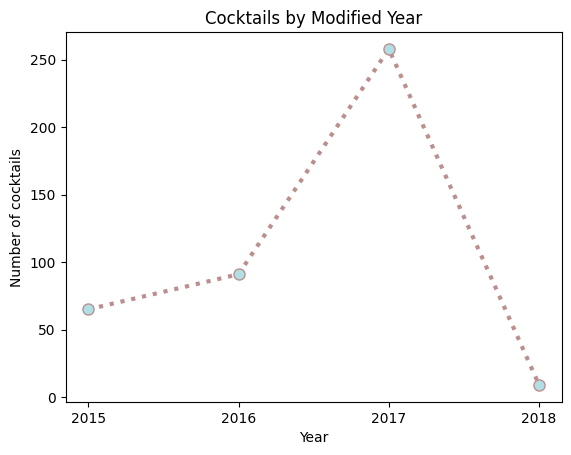

In [22]:
mod_year = df.groupby('modified_year',as_index=False).agg({'name':'count'})
mod_year['modified_year'] = mod_year['modified_year'].astype(int)

plt.plot(mod_year.modified_year, mod_year.name, color='rosybrown', linestyle=':', linewidth=3, marker='o',
         markerfacecolor='powderblue', markersize=8)

plt.xticks(mod_year.modified_year.unique())
plt.xlabel('Year')
plt.ylabel('Number of cocktails')
plt.title('Cocktails by Modified Year')

plt.show()



---

The most number of cocktails were entered into the database in 2017. And the last cocktail modification was in 2018.


---



---



#### Pie Chart of alcohol content

In [23]:
df.alcoholic.nunique()

3

In [24]:
# Group cocktails by alcohol content
alcohol = df['alcoholic']
number = alcohol.value_counts()

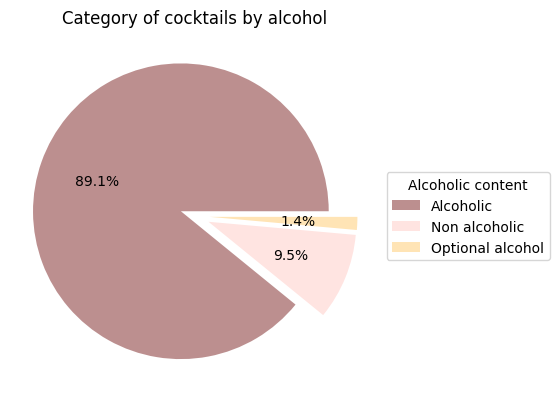

In [25]:
# Graph a pie chart
fig, ax = plt.subplots()

#add colors
colors = ['rosybrown','mistyrose','moccasin']

#add explosions
explosions = [0.1, 0.1, 0.1]

plt.pie(x=number, autopct='%1.1f%%', colors = colors, explode=explosions)

# add title and legend
ax.legend(number.index,
          title="Alcoholic content",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Category of cocktails by alcohol")

plt.show()



---


In our data set there are almost 90% alcoholic beverages.


---



---



#### Table of used glasses

In [26]:
# Check different types of glasses
df.glass.nunique()

39

In [27]:
df['glass'].unique()

array(['Cocktail glass', 'Shot glass', 'Martini Glass', 'Highball Glass',
       'Highball glass', 'Collins Glass', 'Old-fashioned glass',
       'Collins glass', 'Whiskey sour glass', 'Champagne Flute',
       'Old-Fashioned glass', 'Margarita glass', 'Coupe Glass',
       'Beer pilsner', 'Punch bowl', 'Coffee mug', 'Beer mug',
       'Shot Glass', 'Punch Bowl', 'Pint glass', 'Coffee Mug',
       'Hurricane glass', 'Pitcher', 'Beer Glass', 'Champagne flute',
       'Cocktail Glass', 'Irish coffee cup', 'Mason jar', 'Balloon Glass',
       'Wine Glass', 'Cordial glass', 'Brandy snifter', 'Copper Mug',
       'Jar', 'Nick and Nora Glass', 'White wine glass', 'Whiskey Glass',
       'Pousse cafe glass', 'Margarita/Coupette glass'], dtype=object)

In [28]:
#
df.glass = df['glass'].str.title()
df.glass = df.glass.replace({'Beer Glass':'Beer Pilsner',
                  'Beer Mug':'Beer Pilsner',
                  'Jar':'Mason Jar',
                  'Pint Glass':'Beer Pilsner',
                  'Whiskey Sour Glass':'Whiskey Glass',
                  'Coupe Glass':'Cocktail Glass',
                  'Margarita/Coupette Glass':'Margarita Glass',
                  'Copper Mug':'Highball Glass',
                  'Pousse Cafe Glass':'Cordial Glass'
                  })

In [29]:
df.glass.nunique()

22

In [30]:
df.groupby('glass', as_index=False).agg({'id':'count'}).sort_values('id',ascending=False)

,glass,id
4,Cocktail Glass,101
8,Highball Glass,99
6,Collins Glass,58
15,Old-Fashioned Glass,39
18,Shot Glass,24
5,Coffee Mug,16
19,Whiskey Glass,15
1,Beer Pilsner,9
17,Punch Bowl,8
11,Margarita Glass,6




---
The most popular glasses for cocktails are Cocktail Glass, Highball Glass and Collins Glass.


---



---




#### Top-10 Ingredients (Bar Chart)

In [31]:
# Find Top-10 ingredients of cocktails

# Flatten the lists in the 'ingredients' column
all_ingredients = [ingredient for ingredients_list in df['ingredients'] for ingredient in ingredients_list]

# Create a Pandas Series to count occurrences of each ingredient
ingredients_series = pd.Series(all_ingredients)


In [32]:
ingredients_series.unique()

array(['Gin', 'Grand Marnier', 'Lemon Juice', 'Grenadine', 'Amaretto',
       'Baileys irish cream', 'Cognac', 'Heavy cream', 'Milk',
       'Egg White', '151 proof rum', 'Wild Turkey', 'Dark rum',
       'Lemon juice', 'Absolut Vodka', 'Tonic water', 'Applejack',
       'Grapefruit juice', 'Vodka', 'Pisang Ambon', 'Apple juice',
       'Lemonade', 'Orange juice', 'Maraschino cherry',
       'Strawberry schnapps', 'Cranberry juice', 'Club soda',
       'Peach nectar', 'Kahlua', 'Egg white', 'Vermouth', 'Triple sec',
       'Light rum', 'Lime juice', 'Sugar', 'Mint', 'Scotch',
       'Sweet Vermouth', 'Dry Vermouth', 'Orange bitters', 'lemon juice',
       'maraschino liqueur', 'Creme de Banane', 'Jack Daniels',
       'Midori melon liqueur', 'Sour mix', 'Pineapple juice',
       'Frangelico', 'Coffee', 'Cream', 'Creme de Cacao', 'Light cream',
       'Nutmeg', 'Soda water', 'Bourbon', 'Blackberry brandy',
       'Lemon peel', 'Campari', 'Orange peel', 'Sambuca',
       'Orange Bitters'

In [33]:
ingredients_series.nunique()

327

In [34]:
ingredients_series = ingredients_series.str.title()

ingredients_series = ingredients_series.replace({'Absolut Vodka':'Vodka',
                  'Pepsi Cola':'Coca-Cola',
                  'Pisang Ambon':'Banana Liqueur',
                  'Tonic water':'Soda Water',
                  'Carbonated water':'Soda Water'})

ingredients_series.nunique()

290

In [35]:
# Get the top 10 ingredients
top_10_ingredients = ingredients_series.value_counts().head(10)

top_10_ingredients

Gin             81
Vodka           65
Sugar           51
Lemon Juice     49
Orange Juice    44
Lemon           40
Ice             36
Lime Juice      33
Grenadine       31
Lime            30
dtype: int64

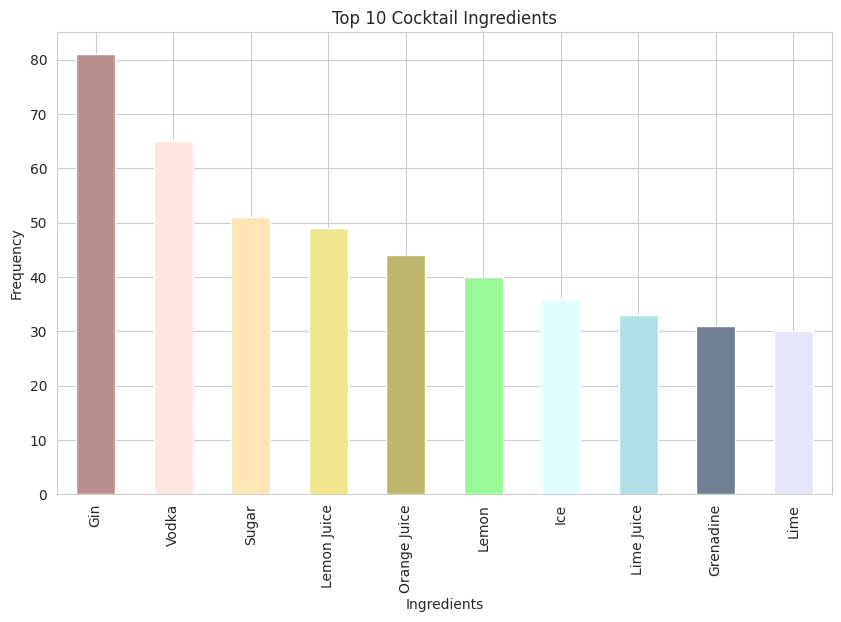

In [60]:
#add colors
colors2 = ['rosybrown','mistyrose','moccasin','khaki', 'darkkhaki', 'palegreen', 'lightcyan', 'powderblue', 'slategray', 'lavender']

plt.figure(figsize=(10, 6))
top_10_ingredients.plot(kind='bar', color=colors2)

plt.title('Top 10 Cocktail Ingredients')
plt.xlabel('Ingredients')
plt.ylabel('Frequency')
plt.show()


In [37]:
# Percent of cocktails with Gin
top_10_ingredients[0]/len(df.id)*100

19.148936170212767



---

So now we know the most popular ingredients in cocktails. Gin is found in almost one in five cocktails.


---



---



#### Most Exotic Cocktail

In [38]:
# Use Counter to calculate the frequency of occurrence of each ingredient
from collections import Counter
ingredient_count = Counter(ingredients_series)

# Find ingredients that occur only once
once_ingredient = [ingredient for ingredient, count in ingredient_count.items() if count == 1]

print(len(once_ingredient))

114


In [39]:
# Filter cocktails with 2 or more unique ingredients
df_filtered = df[df['ingredients'].apply(lambda x: sum(i in once_ingredient for i in x) >= 2)]

df_filtered

,id,name,category,alcoholic,glass,ingredients,measurements,instructions,modified_date,modified_year
88,17182,Duchamp's Punch,Cocktail,Alcoholic,Old-Fashioned Glass,"[Pisco, Lime Juice, Pineapple Syrup, St. Germa...","[5 cl, 2.5 cl, 2.5 cl, 1.5 cl, 2 Dashes, Pinch...",Shake all ingredients.\r\nDouble strain in a c...,2017-01-22 11:31:25,2017.0
107,178344,Figgy Thyme,Cocktail,Alcoholic,Highball Glass,"[Vodka, Honey, Figs, Thyme, Angostura Bitters,...","[2 oz, 1 tsp, 3, 1 Sprig, 2 dashes, Top]","In a lewis bag, crush up some ice like a balle...",NaT,2017.0
116,13070,Fahrenheit 5000,Shot,Alcoholic,Shot Glass,"[Firewater, Absolut Peppar, Tabasco sauce]","[1/2 oz , 1/2 oz , 1 dash ]",Cover bottom of shot glass with Tabasco Sauce ...,2016-09-08 15:24:52,2016.0
159,178313,Halloween Punch,Punch / Party Drink,Alcoholic,Punch Bowl,"[Cherry Juice, Orange Peel, Red Chili Flakes, ...","[1 bottle, 3, 1, 10, 6, 20 cl]","Tip the cherry juice, orange peel, chilli, cin...",NaT,2017.0
168,12738,Hot Chocolate to Die for,Cocoa,Non alcoholic,Coffee Mug,"[Chocolate, Butter, Vanilla extract, Half-and-...","[12 oz fine , 1 tsp , 1/2 tsp , 1 cup , mini ]","Melt the chocolate, butter and vanilla in a do...",2017-02-20 15:06:06,2017.0
236,178343,Michelada,Cocktail,Alcoholic,Beer Pilsner,"[Beer, Tomato Juice, Lime Juice, Hot Sauce, Wo...","[4 oz, 4 oz, 1 tblsp, Dash, Dash, Dash]","Mix the beer with tomato juice, freshly squeez...",NaT,2017.0
282,17829,Penicillin,Cocktail,Alcoholic,Old-Fashioned Glass,"[Blended Scotch, Lemon Juice, Honey syrup, Gin...","[2 oz, 3/4 oz, 2 tsp, 2 tsp, 1/4 oz]","Shake blended Scotch, lemon juice, honey syrup...",2018-03-24 00:58:16,2018.0
341,178349,Snowday,Cocktail,Alcoholic,Collins Glass,"[Vodka, Amaro Montenegro, Ruby Port, Blood Ora...","[1 oz, 1 oz, 1 oz, 1 tsp, Dash, Garnish with]",Stir all ingredients with ice. Strain into a c...,NaT,2017.0


<ipython-input-40-da5b52597222>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['num_unique_ingredients'] = df_filtered['ingredients'].apply(lambda x: sum(ingredient in once_ingredient for ingredient in x))


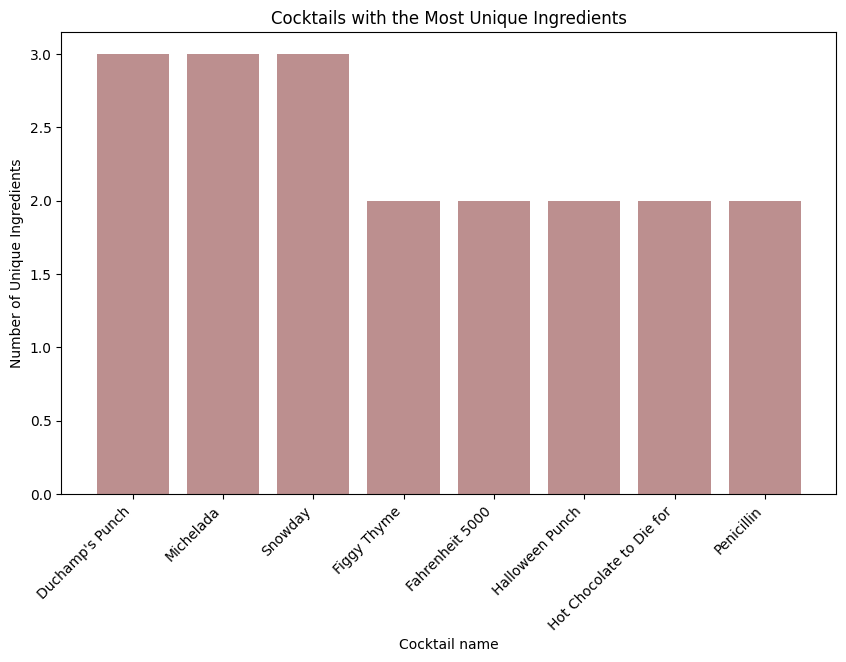

In [40]:
# Calculate the number of unique ingredients for each cocktail
df_filtered['num_unique_ingredients'] = df_filtered['ingredients'].apply(lambda x: sum(ingredient in once_ingredient for ingredient in x))

df_filtered = df_filtered.sort_values(by='num_unique_ingredients', ascending=False)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(df_filtered['name'], df_filtered['num_unique_ingredients'], color='rosybrown')
plt.title('Cocktails with the Most Unique Ingredients')
plt.xlabel('Cocktail name')
plt.ylabel('Number of Unique Ingredients')
plt.xticks(df_filtered['name'], rotation=45, ha='right')
plt.show()

In [41]:
exotic_cocktails = df.query('name == "Michelada" or name == "Duchamp\'s Punch" or name == "Snowday"')

In [42]:
exotic_cocktails[['name', 'alcoholic', 'glass', 'ingredients']]

,name,alcoholic,glass,ingredients
88,Duchamp's Punch,Alcoholic,Old-Fashioned Glass,"[Pisco, Lime Juice, Pineapple Syrup, St. Germa..."
236,Michelada,Alcoholic,Beer Pilsner,"[Beer, Tomato Juice, Lime Juice, Hot Sauce, Wo..."
341,Snowday,Alcoholic,Collins Glass,"[Vodka, Amaro Montenegro, Ruby Port, Blood Ora..."


In [43]:
exotic_cocktails.ingredients.iloc[1]

['Beer',
 'Tomato Juice',
 'Lime Juice',
 'Hot Sauce',
 'Worcestershire Sauce',
 'Soy Sauce']



---

So, there are 3 exotic cocktails, which include 3 unique ingredients. All of them are alcoholic.


---



---



#### A Cocktail with the most number of Ingredients

In [44]:
# Add a new column 'num_ingredients' representing the count of ingredients in each cocktail
df['num_ingredients'] = df['ingredients'].apply(len)

# Find the index of the row with the maximum number of ingredients
max_ingredients_index = df['num_ingredients'].idxmax()

# Get the cocktail with the maximum number of ingredients
cocktail_with_most_ingredients = df.loc[max_ingredients_index]
cocktail_with_most_ingredients

id                                                             12910
name                                                      Egg Nog #4
category                                         Punch / Party Drink
alcoholic                                           Optional alcohol
glass                                                     Punch Bowl
ingredients        [Egg yolk, Sugar, Milk, Light rum, Bourbon, Va...
measurements       [6 , 1/4 cup , 2 cups , 1/2 cup , 1/2 cup , 1 ...
instructions       In a small mixer bowl beat egg yolks till blen...
modified_date                                    2016-07-18 22:02:27
modified_year                                                 2016.0
num_ingredients                                                   11
Name: 94, dtype: object



---


"Egg Nog #4" has the most number of ingredients - 11.


---



---



#### Box Plot of Ingredients

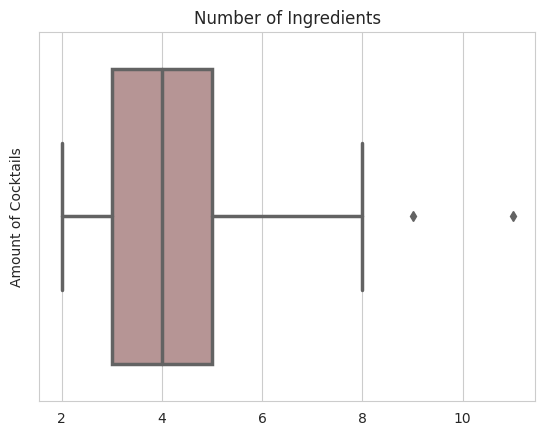

In [45]:
# Creating Box Plot Number of Ingredients in Cocktails

sns.set_style("whitegrid")
sns.boxplot(x=df.num_ingredients, color="rosybrown", linewidth=2.5)

plt.title('Number of Ingredients')
plt.xlabel("")
plt.ylabel('Amount of Cocktails')
plt.show()



---

There are most often 4 ingredients in cocktails.


---



#### New Year Cocktail

In [46]:
# Find cocktails that include champagne for New Year Night
cocktails_with_champagne = df[df['ingredients'].apply(lambda x: 'Champagne' in x)]

len(cocktails_with_champagne)

6

In [47]:
cocktails_with_champagne

,id,name,category,alcoholic,glass,ingredients,measurements,instructions,modified_date,modified_year,num_ingredients
30,17195,Bellini,Ordinary Drink,Alcoholic,Champagne Flute,"[Champagne, Peach schnapps]","[6 oz , 1 oz ]","Pour peach purée into chilled flute, add spark...",2017-09-02 16:52:23,2017.0,2
92,178334,Death in the Afternoon,Cocktail,Alcoholic,Margarita Glass,"[Absinthe, Champagne]","[2 shots, Top]","Easy as you like, pour the absinthe into a chi...",NaT,2017.0,2
106,17197,French 75,Ordinary Drink,Alcoholic,Collins Glass,"[Gin, Sugar, Lemon juice, Champagne, Orange, M...","[1 1/2 oz , 2 tsp superfine , 1 1/2 oz , 4 oz ...","Combine gin, sugar, and lemon juice in a cockt...",2017-09-02 17:10:15,2017.0,6
193,17203,Kir,Ordinary Drink,Alcoholic,Wine Glass,"[Creme de Cassis, Champagne]","[1 part , 5 parts ]",Add the crème de cassis to the bottom of the g...,2017-09-02 17:38:14,2017.0,2
233,17205,Mimosa,Ordinary Drink,Alcoholic,Champagne Flute,"[Champagne, Orange juice]","[Chilled , 2 oz ]","Ensure both ingredients are well chilled, then...",2017-09-02 17:44:45,2017.0,2
342,178322,Spice 75,Cocktail,Alcoholic,Wine Glass,"[Sugar, Allspice, Rum, Lime Juice, Champagne, ...","[60 ml, 1 tblsp, 20 cl, 90 ml, 6 cl, Garnish w...",Gently warm 60g golden caster sugar in a pan w...,NaT,2017.0,6


In [48]:
# Filter the easiest cocktail recepies
# Add a new column 'num_ingredients' representing the count of ingredients in each cocktail
cocktails_with_champagne['num_ingredients'] = cocktails_with_champagne['ingredients'].apply(len)

# Filter cocktails with only 2 ingredients
easy_cocktail = cocktails_with_champagne[cocktails_with_champagne['num_ingredients'] == 2]

easy_cocktail

<ipython-input-48-7467c4d98ad2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cocktails_with_champagne['num_ingredients'] = cocktails_with_champagne['ingredients'].apply(len)


,id,name,category,alcoholic,glass,ingredients,measurements,instructions,modified_date,modified_year,num_ingredients
30,17195,Bellini,Ordinary Drink,Alcoholic,Champagne Flute,"[Champagne, Peach schnapps]","[6 oz , 1 oz ]","Pour peach purée into chilled flute, add spark...",2017-09-02 16:52:23,2017.0,2
92,178334,Death in the Afternoon,Cocktail,Alcoholic,Margarita Glass,"[Absinthe, Champagne]","[2 shots, Top]","Easy as you like, pour the absinthe into a chi...",NaT,2017.0,2
193,17203,Kir,Ordinary Drink,Alcoholic,Wine Glass,"[Creme de Cassis, Champagne]","[1 part , 5 parts ]",Add the crème de cassis to the bottom of the g...,2017-09-02 17:38:14,2017.0,2
233,17205,Mimosa,Ordinary Drink,Alcoholic,Champagne Flute,"[Champagne, Orange juice]","[Chilled , 2 oz ]","Ensure both ingredients are well chilled, then...",2017-09-02 17:44:45,2017.0,2


In [49]:
# Make a list of ingredients for New Year Cocktails
what_to_buy = [ingredient for ingredients_list in easy_cocktail['ingredients'] for ingredient in ingredients_list]

list_of_ingredients = pd.Series(what_to_buy)
list_of_ingredients.value_counts()

Champagne          4
Peach schnapps     1
Absinthe           1
Creme de Cassis    1
Orange juice       1
dtype: int64

# Conclusions

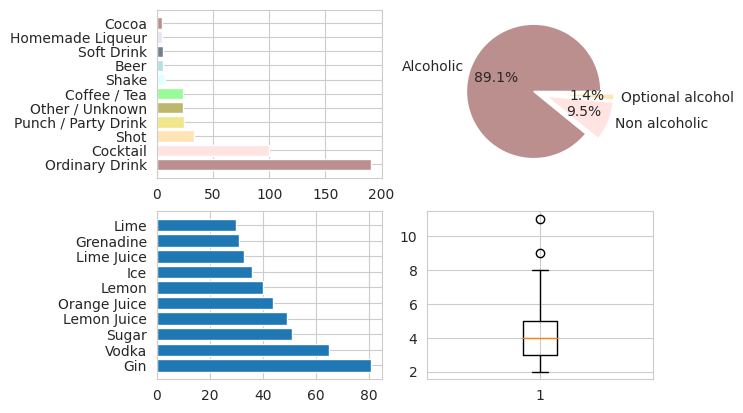

In [67]:
# Collect all information together

fig, axs = plt.subplots(2, 2)

axs[0, 0].barh(counts.index, counts, color = colors)
axs[0, 1].pie(x=number, labels=df['alcoholic'].unique(), autopct='%1.1f%%', colors = colors, explode=explosions)
axs[1, 0].barh(top_10_ingredients.index,top_10_ingredients.values)
axs[1, 1].boxplot(x=df.num_ingredients)

plt.show()


---
---
In conclusion, the analysis of the cocktail dataset reveals several key insights into the preferences and trends within the dataset:

The most popular cocktail in the dataset is the "Ordinary Drink."
The last modification to cocktails in the dataset occurred in 2018, indicating lack of updates since then.

Approximately 90% of the cocktails in the dataset are alcoholic, highlighting a strong inclination towards alcoholic beverages.
The most popular glasses for cocktails are the Cocktail Glass, Highball Glass, and Collins Glass, indicating a preference for specific glassware when serving cocktails.

Gin stands out as the most prevalent ingredient, being found in almost one in five cocktails. This suggests a high affinity for gin-based drinks in the dataset.

There are three exotic cocktails in the dataset, each featuring three unique ingredients.

"Egg Nog #4" holds the record for the highest number of ingredients, boasting 11 components. This indicates a willingness to experiment with diverse and elaborate cocktail recipes.

Most cocktails in the dataset contain four ingredients, suggesting a balance between complexity and simplicity in the recipes.

A curated list of four cocktails containing champagne specifically for New Year's night implies the association of champagne with celebratory moments.

---
---
---


